# Fake Job Description Prediction

### About Dataset :
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
WNlemma = nltk.WordNetLemmatizer()
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#importing the data
data = pd.read_csv('fake_job_postings.csv')
target = data['fraudulent']

## Exploratory Data Analysis

In [3]:
print((data.isna().sum()/len(data))*100)
#drop department and salary_range because it have about 60 persent null values and removing irrelavent data from the dataset
data.drop(['job_id','salary_range','department','benefits'],axis=1,inplace=True)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


In [4]:
data.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

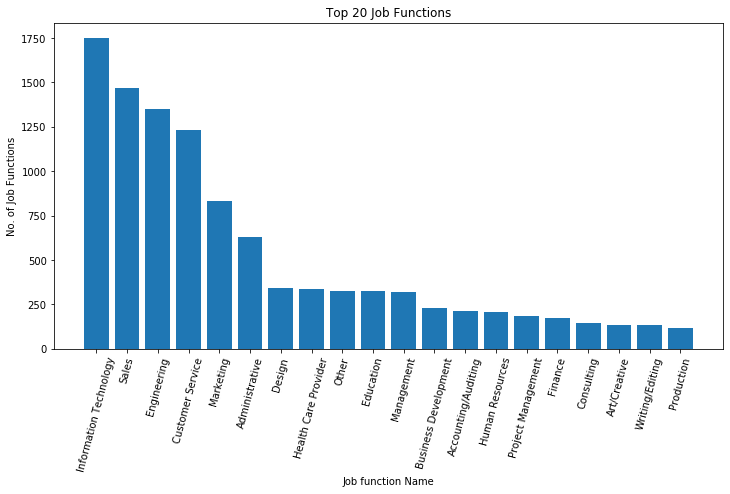

In [5]:
#Plotting the bar plot jobs funtion counts
plt.figure(figsize=(12,6))
plt.bar(data.function.value_counts().index[:20],data.function.value_counts()[:20])
plt.title('Top 20 Job Functions')
plt.xlabel('Job function Name')
plt.ylabel("No. of Job Functions")
degrees = 75
plt.xticks(rotation=degrees)

Text(0, 0.5, 'Industry Name')

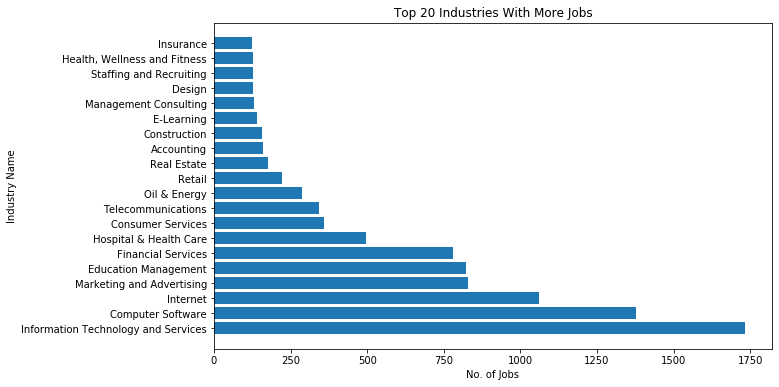

In [6]:
#plot top 20 industries which give most of job posting
plt.figure(figsize=(10,6))
plt.barh(data.industry.value_counts()[:20].index,data.industry.value_counts()[:20])
plt.title('Top 20 Industries With More Jobs')
plt.xlabel('No. of Jobs')
plt.ylabel("Industry Name")

In [7]:
#separate both data to analyse them
fradulent_data = data[data.fraudulent==1]
non_fradulent_data = data[data.fraudulent==0]

print('Number of fake Job description: ',len(fradulent_data))
print('Number of correct job description: ',len(non_fradulent_data))

Number of fake Job description:  866
Number of correct job description:  17014


In [8]:
#Missing values in fake jobs data
fradulent_data.isna().sum()/866*100

title                   0.000000
location                2.193995
company_profile        67.782910
description             0.115473
requirements           17.782910
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [9]:
#missing values in correct jobs
non_fradulent_data.isna().sum()/len(non_fradulent_data)*100

title                   0.000000
location                1.921947
company_profile        15.992712
description             0.000000
requirements           14.934760
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

In [10]:
#removing target values form dataset
data.drop(['fraudulent'],axis=1,inplace=True)

In [11]:
data.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

# Cleaning and preprocessing the data

In [12]:
import re
def remove_links(text):
    text  = re.sub(r'http://[\w|\S]+',' ',str(text))
    return text

In [13]:
def lower_text(text):
    text = str(text)
    text = ' '.join(x.lower() for x in text.split())
    return text

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopWords(text):
    text = str(text)
    text = ''.join( x for x in text if x.split() not in stop)
    return(text)

In [15]:
def remove_non_imp_words(series):
    most_freq = pd.Series(' '.join(series).split()).value_counts()[:30]
    less_freq = pd.Series(' '.join(series).split()).value_counts()[-30:]
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
    return series

def remove_nan(text):
    if text == 'nan' or text == '':
        text = 'not given'
    return text

In [16]:
def data_cleaning(feature):
    feature = feature.apply(lambda x : remove_links(x))
    feature = feature.apply(lambda x : lower_text(x))
    feature = feature.apply(lambda x : remove_stopWords(x))
    feature = feature.str.replace('[^\w\s]',' 111')
    feature = remove_non_imp_words(feature)
    feature = feature.apply(lambda x: ' '.join([WNlemma.lemmatize(word) for word in x.split()]))
    feature = feature.apply(lambda x : remove_nan(x))
    return feature


In [17]:
data['required_education'].fillna('no_info_about_education',inplace = True)
data['employment_type'].fillna('no_info_about_employment',inplace = True)
data['required_experience'].fillna('experience_not_asked',inplace = True)
data['industry'].fillna('industry_not_given',inplace = True)
data['function'].fillna('function_not_given',inplace = True)

In [18]:
#dealing with company profile feature
for i in range(len(data.company_profile)):
    if data.company_profile[i]=='NaN':
        data.company_profile[i] = 'company_profile_not_given'
    else:
        data.company_profile[i] = 'company_profile_given'

C:\Users\Pranjal Soni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#dealing catogorical data
cat_cols = ['employment_type','required_experience','required_education','industry','function','company_profile']
for c in cat_cols:
    encoded = pd.get_dummies(data[c])
    data = pd.concat([data,encoded],axis = 1 )
cat_cols = ['employment_type','required_experience','required_education','industry','function','title','location','company_profile']
data.drop(cat_cols,axis=1,inplace=True)

In [20]:
#dealing with text data
description = data['description']+ ' ' +  data['requirements']
description = data_cleaning(description)

In [21]:
tfidf = TfidfVectorizer( min_df = 0.05, ngram_range=(1,3))
tfidf_features = tfidf.fit_transform(description) 
tfidf_vect_df = pd.DataFrame(tfidf_features.todense(), columns = tfidf.get_feature_names())
data = pd.concat([data, tfidf_vect_df], axis = 1)
data.drop(['description','requirements'],axis = 1 , inplace = True)

In [22]:
#data after preprocssing
data.head()

,telecommuting,has_company_logo,has_questions,Contract,Full-time,Other,Part-time,Temporary,no_info_about_employment,Associate,...,word,working,world,would,writing,written,written communication,written verbal,year,your
0,0,1,0,0,0,1,0,0,0,0,...,0.0,0.133523,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0,1,0,0,1,0,0,0,0,0,...,0.0,0.067582,0.245470,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.034339
2,0,1,0,0,0,0,0,0,1,0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,0,0,0,0,...,0.0,0.000000,0.094934,0.0,0.0,0.039119,0.0,0.060263,0.054795,0.099603
4,0,1,1,0,1,0,0,0,0,0,...,0.0,0.052445,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.043980,0.000000


# Applying different classification algorithms

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

X = data
y = target

In [67]:
from sklearn.utils import resample

def oversampling(X_train,y_train,target_name):
    
    training_set = pd.concat([X_train, y_train], axis=1)
    
    # Separating classes
    fraud = training_set[training_set[target_name] == 1]
    not_fraud = training_set[training_set[target_name] == 0]
    
    oversample = resample(fraud, 
                       replace=True, 
                       n_samples=len(not_fraud),
                       random_state=42)
    
    # Returning to new training set
    oversample_train = pd.concat([not_fraud, oversample])
    oversample_train[target_name].value_counts(normalize=True)
    
    # Separate oversampled data into X and y sets
    oversample_x_train = oversample_train.drop('fraudulent', axis=1)
    oversample_y_train = oversample_train[target_name]
    return(oversample_x_train, oversample_y_train)

## Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=-1)

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X_new,y):
    print('    **********************************************    ')
    #select rows
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    oversample_x_train, oversample_y_train = oversampling(X_train,y_train,'fraudulent')
    
    
    #fit the model with training data
    lr_clf.fit(oversample_x_train, oversample_y_train)
    
    #feature_selection
    sfm = SelectFromModel(lr_clf,threshold=0.002)
    sfm.fit(oversample_x_train, oversample_y_train)
    
    X_important_train = sfm.transform(oversample_x_train)
    X_important_test = sfm.transform(X_test)
    
    lr_clf = LogisticRegression()
    lr_clf.fit(X_important_train,  oversample_y_train)
    y_train_pred = lr_clf.predict(X_important_train)
    y_test_pred = lr_clf.predict(X_important_test)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score( oversample_y_train,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(y_test,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : \n',confusion_matrix( oversample_y_train,y_train_pred))
    print('Confusion Matrix of Test Data : \n',confusion_matrix(y_test,y_test_pred))
    print()
    #pricision and recall for test and train data
    print(classification_report(y_test,y_test_pred))
    print()

    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.94967305855558
Test Data Accuracy :  0.9172259507829977

Confusion Matrix of Train Data : 
 [[12518  1093]
 [  277 13334]]
Confusion Matrix of Test Data : 
 [[3134  269]
 [  27  146]]

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3403
           1       0.35      0.84      0.50       173

    accuracy                           0.92      3576
   macro avg       0.67      0.88      0.73      3576
weighted avg       0.96      0.92      0.93      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Data Accuracy :  0.9454485342737492
Test Data Accuracy :  0.9012863534675615

Confusion Matrix of Train Data : 
 [[12502  1109]
 [  376 13235]]
Confusion Matrix of Test Data : 
 [[3076  327]
 [  26  147]]

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      3403
           1       0.31      0.85      0.45       173

    accuracy                           0.90      3576
   macro avg       0.65      0.88      0.70      3576
weighted avg       0.96      0.90      0.92      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Data Accuracy :  0.9480567188303578
Test Data Accuracy :  0.9077181208053692

Confusion Matrix of Train Data : 
 [[12552  1059]
 [  355 13256]]
Confusion Matrix of Test Data : 
 [[3094  309]
 [  21  152]]

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3403
           1       0.33      0.88      0.48       173

    accuracy                           0.91      3576
   macro avg       0.66      0.89      0.71      3576
weighted avg       0.96      0.91      0.93      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Data Accuracy :  0.949636323561825
Test Data Accuracy :  0.9049217002237137

Confusion Matrix of Train Data : 
 [[12535  1076]
 [  295 13316]]
Confusion Matrix of Test Data : 
 [[3090  313]
 [  27  146]]

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3403
           1       0.32      0.84      0.46       173

    accuracy                           0.90      3576
   macro avg       0.65      0.88      0.70      3576
weighted avg       0.96      0.90      0.92      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Data Accuracy :  0.9475095503967088
Test Data Accuracy :  0.9119127516778524

Confusion Matrix of Train Data : 
 [[12538  1074]
 [  355 13257]]
Confusion Matrix of Test Data : 
 [[3121  281]
 [  34  140]]

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3402
           1       0.33      0.80      0.47       174

    accuracy                           0.91      3576
   macro avg       0.66      0.86      0.71      3576
weighted avg       0.96      0.91      0.93      3576




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X_new,y):
    print('    **********************************************    ')
    #select rows
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    oversample_x_train, oversample_y_train = oversampling(X_train,y_train,'fraudulent')
    
    
    #fit the model with training data
    lr_clf.fit(oversample_x_train, oversample_y_train)
    
    
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(oversample_x_train,  oversample_y_train)
    y_train_pred = knn_clf.predict(oversample_x_train)
    y_test_pred = knn_clf.predict(X_test)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score( oversample_y_train,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(y_test,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : \n',confusion_matrix( oversample_y_train,y_train_pred))
    print('Confusion Matrix of Test Data : \n',confusion_matrix(y_test,y_test_pred))
    print()
    #pricision and recall for test and train data
    print(classification_report(y_test,y_test_pred))
    print()

    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.9530159429872896
Test Data Accuracy :  0.9544183445190156

Confusion Matrix of Train Data : 
 [[13290   321]
 [  958 12653]]
Confusion Matrix of Test Data : 
 [[3278  125]
 [  38  135]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.52      0.78      0.62       173

    accuracy                           0.95      3576
   macro avg       0.75      0.87      0.80      3576
weighted avg       0.97      0.95      0.96      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.9511791932995372
Test Data Accuracy :  0.9555369127516778

Confusion Matrix of Train Data : 
 [[13308   303]
 [ 1026 12585]]
Confusion Matrix of Test Data : 
 [[3288  115]
 [  44  129]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.53      0.75      0.62       173

    accuracy                           0.96      3576
   macro avg       0.76      0.86      0.80      3576
weighted avg       0.96      0.96      0.96      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.9570200573065902
Test Data Accuracy :  0.9538590604026845

Confusion Matrix of Train Data : 
 [[13294   317]
 [  853 12758]]
Confusion Matrix of Test Data : 
 [[3285  118]
 [  47  126]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.52      0.73      0.60       173

    accuracy                           0.95      3576
   macro avg       0.75      0.85      0.79      3576
weighted avg       0.96      0.95      0.96      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.9548159576812872
Test Data Accuracy :  0.9530201342281879

Confusion Matrix of Train Data : 
 [[13302   309]
 [  921 12690]]
Confusion Matrix of Test Data : 
 [[3277  126]
 [  42  131]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.51      0.76      0.61       173

    accuracy                           0.95      3576
   macro avg       0.75      0.86      0.79      3576
weighted avg       0.96      0.95      0.96      3576


    **********************************************    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Data Accuracy :  0.9522847487511019
Test Data Accuracy :  0.9569351230425056

Confusion Matrix of Train Data : 
 [[13311   301]
 [  998 12614]]
Confusion Matrix of Test Data : 
 [[3287  115]
 [  39  135]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3402
           1       0.54      0.78      0.64       174

    accuracy                           0.96      3576
   macro avg       0.76      0.87      0.81      3576
weighted avg       0.97      0.96      0.96      3576




## Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1)

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_ix, test_ix in kfold.split(X_new,y):
    print('    **********************************************    ')
    #select rows
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    oversample_x_train, oversample_y_train = oversampling(X_train,y_train,'fraudulent')
    
    
    #fit the model with training data
    rf_clf.fit(oversample_x_train, oversample_y_train)
    
    #feature_selection
    sfm = SelectFromModel(rf_clf,threshold=0.002)
    sfm.fit(oversample_x_train, oversample_y_train)
    
    X_important_train = sfm.transform(oversample_x_train)
    X_important_test = sfm.transform(X_test)
    
    rf_clf = RandomForestClassifier(n_estimators=459, max_depth=30,oob_score=True,n_jobs=-1)
    rf_clf.fit(X_important_train,  oversample_y_train)
    y_train_pred = rf_clf.predict(X_important_train)
    y_test_pred = rf_clf.predict(X_important_test)
    #evalute the model
    print('Train Data Accuracy : ',accuracy_score( oversample_y_train,y_train_pred))
    print('Test Data Accuracy : ',accuracy_score(y_test,y_test_pred))
    
    print()
    print('Confusion Matrix of Train Data : \n',confusion_matrix( oversample_y_train,y_train_pred))
    print('Confusion Matrix of Test Data : \n',confusion_matrix(y_test,y_test_pred))
    print()
    #pricision and recall for test and train data
    print(classification_report(y_test,y_test_pred))
    print()

    **********************************************    
Train Data Accuracy :  0.9865549922856514
Test Data Accuracy :  0.9711968680089486

Confusion Matrix of Train Data : 
 [[13431   180]
 [  186 13425]]
Confusion Matrix of Test Data : 
 [[3359   44]
 [  59  114]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3403
           1       0.72      0.66      0.69       173

    accuracy                           0.97      3576
   macro avg       0.85      0.82      0.84      3576
weighted avg       0.97      0.97      0.97      3576


    **********************************************    
Train Data Accuracy :  0.9805304533098229
Test Data Accuracy :  0.9541387024608501

Confusion Matrix of Train Data : 
 [[13355   256]
 [  274 13337]]
Confusion Matrix of Test Data : 
 [[3304   99]
 [  65  108]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3403
           1       0.52      

In [74]:
for feature_list_index in sfm.get_support(indices=True):
    print(data.columns[feature_list_index],end= ", ")

has_company_logo, has_questions, Full-time, no_info_about_employment, Associate, Mid-Senior level, experience_not_asked, Bachelor's Degree, High School or equivalent, Accounting, Computer Software, Hospital & Health Care, Internet, Oil & Energy, industry_not_given, Administrative, Engineering, function_not_given, 111amp, 111re, 111you, ability, about, area, at, based, benefit, best, but, by, call, candidate, care, client, communication, company, computer, control, creative, degree, deliver, developer, development, duty, engineering, english, environment, excel, field, first, flexible, from, full, get, growing, growth, ha, high, home, hour, if, industry, information, internet, it, job, join, knowledge, looking, love, management, marketing, medium, mobile, month, more, multiple, must, new, no, not, office, only, other, own, passionate, per, perform, personal, phone, platform, play, position, preferred, problem, process, product, provide, required, requirement, responsibility, right, role

In [86]:
#Saving the models
import pickle 
logistic_model = pickle.dumps(lr_clf) 
knn_model = pickle.dumps(knn_clf)
randonForest_model = pickle.dumps(rf_clf)

In [23]:
d = pd.read_csv('fake_job_postings.csv')

In [30]:
d.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [32]:
fraud = d[d['fraudulent'] == 1]
not_fraud =d[d['fraudulent'] == 0]

print(len(fraud))
print(len(not_fraud))

866
17014
